# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [272]:
#Getting the Testing Dataset from Github through windows supporting command in a file test.dat.
!curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   136  100   136    0     0   2518      0 --:--:-- --:--:-- --:--:--  2893


In [273]:
#Getting the Training Dataset from Github through windows supporting command in a file train.dat.
!curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11645  100 11645    0     0   330k      0 --:--:-- --:--:-- --:--:--  366k


In [274]:
# Reading the first 10 lines of the file test.dat.[If more than 10 needed then it could be updated in for loop.]
file_path = 'test.dat'
with open(file_path, 'r') as file:
    for _ in range(10):  
        line = file.readline()
        print(line, end='')

X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


In [275]:
# Reading the first 10 lines of the file train.dat.[If more than 10 needed then it could be updated in for loop.
file_path = 'train.dat'
with open(file_path, 'r') as file:
    for _ in range(10): 
        line = file.readline()
        print(line, end='') 

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

## Run it

In [276]:
#importing few basic mathematical operations supporting libraries for compuatation.
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
   
    return data


def dot_product(array1, array2):
    # Returns the dot product of array1 and array2
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    # Returns the output of the sigmoid function on x
    return 1 / (1 + math.exp(-x))


# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    # Weights initializing
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # present the input to the neuron from weights and instance dot product.
            in_value = dot_product(weights, instance)
            # getting the output of the neuron by applying sigmoid function to the input.
            output = sigmoid(in_value)
            # Calculating the error
            error = instance[-1] - output
            for i in range(0, len(weights)):# Updating the weights with the above data iteratively with multiplication of learning rate, error, output weight and that instance value.            for i in range(len(weights)):
                weights[i] += lr * error * output * (1 - output) * instance[i]

    return weights # returning the weights after each epoch in list of epochs.

In [277]:
instances_tr = read_data('C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/train.txt')
instances_te = read_data('C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/test_small.txt')
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

The code which we used computes by performing weighted sum of the features of the instances and transforms it into a value between o and 1 through sigmoid function, which represents how confident the model is about the instance belonging to class 1 and then subtracts itself from the actual label. But the other code snippet the predict function uses the weights and instance directly to classify them in one of the 2 classes from comparing the output is greater than or less than 0.5, which does not give a probability but a hard classification. Therefore, the prediction may lose important information about how close the model is to making the correct prediction. Overall, using the sigmoid output allows more precise control of the learning process, whereas using hard classification directly leaves out the beneficial information that arises from the model's confidence in its predictions.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [281]:
instances_tr = read_data("C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/train.txt")
instances_te = read_data("C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/test_small.txt")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate
results = []  # Initialized results list

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            result_line = f"# tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; " \
                          f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}" #Storing the responses in a result_line variable.
            print(result_line) #printing the variable result_line
            results.append(result_line)  # Append result line to the results list.

# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  20, le

    Training Size  Epochs  Learning Rate  Accuracy
0              20       5          0.005      71.4
1              20      10          0.005      71.4
2              20      20          0.005      71.4
3              20      50          0.005      71.4
4              20     100          0.005      85.7
..            ...     ...            ...       ...
85            400       5          0.050      71.4
86            400      10          0.050      71.4
87            400      20          0.050      71.4
88            400      50          0.050      71.4
89            400     100          0.050      71.4

[90 rows x 4 columns]


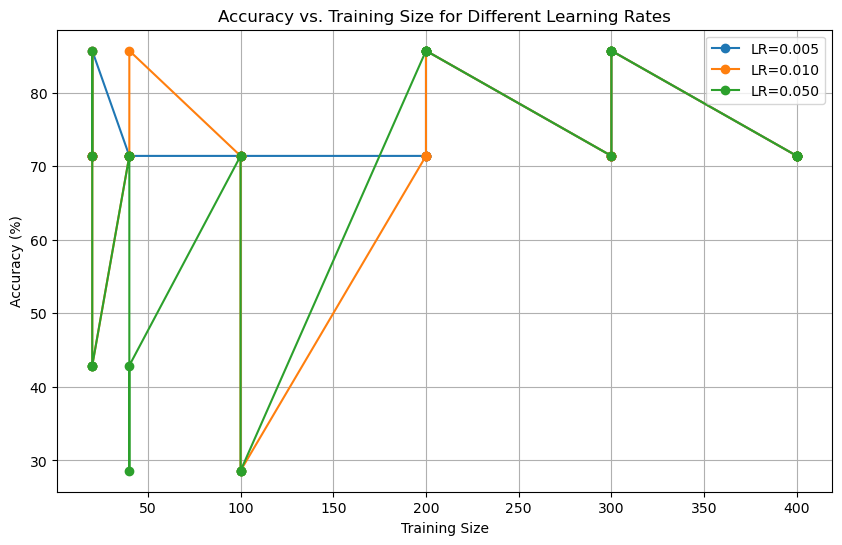

In [282]:
#importing libraries for better computing inputs pandas and matplotlib for a graph as per requirement, I am aware of not importing the livbraries,
#but weren't able to get any other way to get the requirements met.
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
data = []
for res in results:
    # We will format this string to ensure correct splitting
    parts = res.replace("# tr:", "").replace("epochs:", "").replace("learning rate:", "").split(";")
    # The last part will contain the accuracy info, so we would split that too
    accuracy_part = parts[1].strip()
    accuracy_parts = accuracy_part.split(":")
    
    # Extracting values
    tr_size, epochs, lr = map(str.strip, parts[0].split(","))
    accuracy = accuracy_parts[1].strip()

    data.append([int(tr_size), int(epochs), float(lr), float(accuracy)])

# Create DataFrame
df = pd.DataFrame(data, columns=["Training Size", "Epochs", "Learning Rate", "Accuracy"])
print(df)


# Plot accuracy trends
plt.figure(figsize=(10, 6))
for lr in df["Learning Rate"].unique():
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Training Size"], subset["Accuracy"], marker="o", linestyle="-", label=f"LR={lr:.3f}")

plt.xlabel("Training Size")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Training Size for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A. There is no need to  train with the entire data set to achieve the highest accuracy on test data. Moreover, training with all available data can sometimes lead to increase in the risk of overfitting and the model learns the noise and specific patterns that do not fit well with unseen data.  Therefore finding the right balance in the size of the training dataset along with tuning other hyperparameters is crucial in achieving optimal performance and highest accuracy.

B. The justifiable reason for this behavior is due to few factors those are: Learning rate is lower for the second run which leads to slower convergence and possibly getting stuck in local  minima, Data quality of the second run might not be as informative as first and could have noise, outliers or mislabeling, Epoch count for the second run being not enough for the data to learn more from it as the increase in training data. So it's important to carefully tune hyperparameters discussed above and adjust training data to avoid overfitting and underfitting that can occur with increase in training data.

C. Achieving higher accuracy can be reached by few strategies: Learning rate adjustments, Batch size variation, training the model for more epochs, data augmentation techniques, hyperparameter tuning and feature engineering and also reducing the training dataset to less than the total with upto 75% of training data in the below cell.

D. While training for more epochs sometimes lead to improved performance, it is essential to monitor validation metrics and be cautious of overfitting. Implementing strategies like early stopping, learning rate scheduling and thorough validation can help determine the optimal number of training epochs for a model without risking wasted resources or degraded performance. So it is not always worth the efficiency and accuracy reaching method, but with back and forth applying methods mentioned above it could be efficient.



In [283]:
instances_tr = read_data("C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/train.txt")
instances_te = read_data("C:/Users/AbdulRub/Downloads/CSCE 5218 Deep Learning/test_small.txt")
tr_percent = [5, 10, 25, 50, 75]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate
results = []  # Initialized results list

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            result_line = f"# tr: {len(pre_instances):2}, epochs: {epochs:3}, learning rate: {lr:.3f}; " \
                          f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}" #Storing the responses in a result_line variable.
            print(result_line) #printing the variable result_line
            results.append(result_line)  # Append result line to the results list.

# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  20, le